In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Natural selection (w/ drift!) demonstration
## Erol Akçay
### University of Pennsylvania, Biol 417 Spring 2019

#### Haploid case

Let's first look at the haploid case. First define a function that simply gives the frequency in the next generation.

In [3]:
def pprime(p,wA,wB):
    return wA*p/(wA*p+wB*(1-p))

Let's iterate this function with particular fitness values

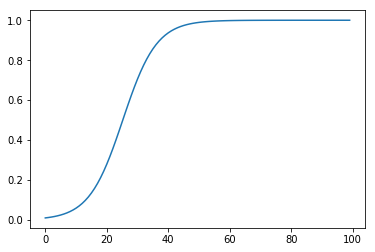

In [6]:
duration=100
phist=np.zeros(duration)
phist[0]=.01
wAA, wBB = (1.2,1)
for i in range(duration-1):
    phist[i+1]=pprime(phist[i],wAA,wBB)
plt.plot(phist)

Allele A has higher fitness than B so not surprisingly, it increases in frequency until it reaches 1 (or fixes in the population, as one says).

Now, let's look at the finite population case. In the finite population, who gets to be picked to make up the next generation is stochastic. What we'll assume is that each individual makes a large number of "propagules" (i.e., offspring that have not yet established themselves). The number of propagules produced by each individual is proportional to the fitness of the alleles they carry. The next generation is then a randomly selected sample from this large propagule pool.

Suppose at the beginning of one life-cycle, the frequency of individuals carrying allele A is p. Then, the frequency of propagules carrying the A allele is simply:
$$
p_{prop}=\frac{pNw_A}{pNw_A+(1-p)Nw_B}=\frac{w_A}{\bar{w}}p\:,
$$
so, the same as the frequency in the next generation in the deterministic model. But now the actual frequency of the next generation is a binomial random variable, with parameters $N$ and $p_{prop}$.

Let's construct a function that iterates this stochastic life-cycle. 

In [19]:
def stochLife(N,p,wA,wB):
    pprop=wA*p/(wA*p+wB*(1-p))
    newpop=np.random.binomial(N,pprop)
    return newpop/N

In [28]:
stochLife(100,.2,1,1)

0.25

Let's first look at a case with neutral alleles, i.e., both alleles have the same fitness. The code below iterates the function for some amount of time

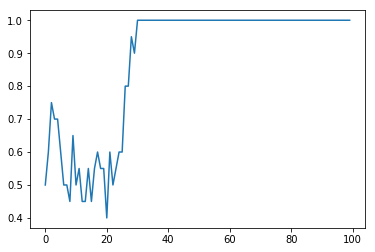

In [37]:
n=20
duration=100
phistst=np.zeros(duration)
phistst[0]=.5
wAA, wBB = (1,1)
for i in range(duration-1):
    phistst[i+1]=stochLife(n,phistst[i],wAA,wBB)
plt.plot(phistst)

What you can observe is that in each iteration, the population seems to fix for one or the other allele. This is called genetic drift, and can be a powerful force of evolution.

But just like with stochastic population dynamics, what's meaningful here is the distribution of many replications of this kind of population, since each particular instance will be determined by random chance. So let's simulate the ensemble.

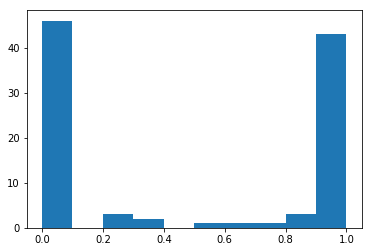

In [93]:
n=100 ## population size
rep=100 ##how many replicate populations to make
ens=np.zeros(rep)
duration=200 ## how long to run each population
wAA, wBB = (1,1)
for j in range(rep):
    pp=0.5 ##initialize with p=0.5
    for i in range(duration-1):
        pp=stochLife(n,pp,wAA,wBB) ##iterates for duration number of times, but doesn't save the whole history
    ens[j]=pp ##only saves the final point
plt.hist(ens) 
plt.show() #plots the histogram

#### Diploid case

Now let's look at the diploid case

In [103]:
def pprimedip(p,wAA,wAB,wBB):
    wbar=p**2*wAA+2*p*(1-p)*wAB+(1-p)**2*wBB
    return 1/wbar*(wAA*p**2+wAB*p*(1-p))

In [108]:
pprimedip(.3,1,1,1)

0.3

Again, let's iterate this system forward

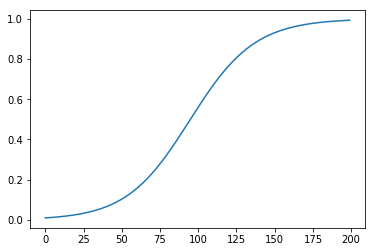

In [110]:
duration=200
phist=np.zeros(duration)
phist[0]=.01
s,h=(.1,.5)
wAA, wAB, wBB = (1+s,1+h*s,1)
for i in range(duration-1):
    phist[i+1]=pprimedip(phist[i],wAA,wAB,wBB)
plt.plot(phist)

Now let's look at the case with underdominance

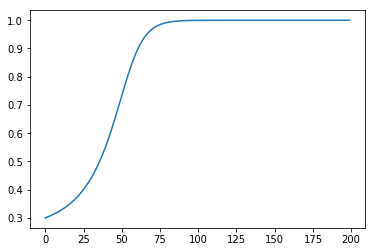

In [116]:
duration=200
phist=np.zeros(duration)
phist[0]=.3
s,h=(.1,-.5)
wAA, wAB, wBB = (1+s,1+h*s,1)
for i in range(duration-1):
    phist[i+1]=pprimedip(phist[i],wAA,wAB,wBB)
plt.plot(phist)

Here's what the mean fitness looks like

In [118]:
def wbar(p,wAA,wAB,wBB):
    return p**2*wAA+2*p*(1-p)*wAB+(1-p)**2*wBB

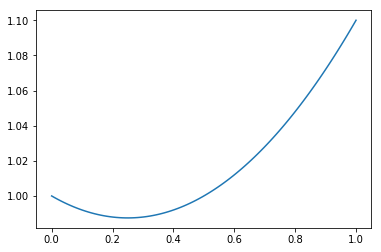

In [126]:
plt.plot(np.linspace(0,1,100), wbar(np.linspace(0,1,100),wAA,wAB,wBB))

What happens with overdominance?

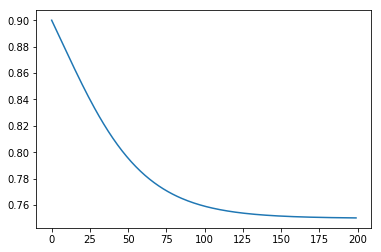

In [128]:
duration=200
phist=np.zeros(duration)
phist[0]=.9
s,h=(.1,1.5)
wAA, wAB, wBB = (1+s,1+h*s,1)
for i in range(duration-1):
    phist[i+1]=pprimedip(phist[i],wAA,wAB,wBB)
plt.plot(phist)

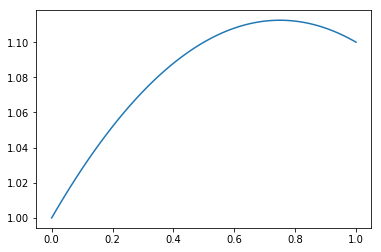

In [129]:
plt.plot(np.linspace(0,1,100), wbar(np.linspace(0,1,100),wAA,wAB,wBB))

So, under- and over-dominance create cases where the mean fitness is non-monotonic in the frequency of the A allele. This is an example of frequency dependence, where the A allele's fitness (which is the average fitness of the genotypes it finds itself in) is a function of its frequency. 